# **1. Importing the Dependencies**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import (confusion_matrix, classification_report, 
                            ConfusionMatrixDisplay, roc_curve, auc,
                            accuracy_score, precision_score, recall_score, f1_score)
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
import pickle
import os
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Set random seed for reproducibility
np.random.seed(42)

In [3]:
# Set plot style
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (10, 6)

# **2. Data Collection and Analysis** 
# PIMA Diabetes Dataset

In [4]:
# loading the diabetes dataset to a pandas DataFrame 
diabetes_dataset = pd.read_csv('../data/diabetes.csv')

print("Dataset Loaded Successfully.")
print(f"\nDataset Shape: {diabetes_dataset.shape}")
print(f"Rows: {diabetes_dataset.shape[0]}, Columns: {diabetes_dataset.shape[1]}")

Dataset Loaded Successfully.

Dataset Shape: (768, 9)
Rows: 768, Columns: 9


In [5]:
# Ensure Outcome column is integer to avoid palette key mismatch errors
diabetes_dataset['Outcome'] = diabetes_dataset['Outcome'].astype(int)


In [6]:
# printing the first 5 rows of the dataset
print("\nFirst 5 rows:")
diabetes_dataset.head()


First 5 rows:


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [7]:
# Dataset information
print("Dataset Information:")
diabetes_dataset.info()

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [8]:
# Statistical summary
print("Structural Summary:")
diabetes_dataset.describe().round(2)

Structural Summary:


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.00,768.00,768.00,768.00,768.00,768.00,768.00,768.00,768.00
mean,3.85,120.89,69.11,20.54,79.80,31.99,0.47,33.24,0.35
std,3.37,31.97,19.36,15.95,115.24,7.88,0.33,11.76,0.48
min,0.00,0.00,0.00,0.00,0.00,0.00,0.08,21.00,0.00
25%,1.00,99.00,62.00,0.00,0.00,27.30,0.24,24.00,0.00
50%,3.00,117.00,72.00,23.00,30.50,32.00,0.37,29.00,0.00
75%,6.00,140.25,80.00,32.00,127.25,36.60,0.63,41.00,1.00
max,17.00,199.00,122.00,99.00,846.00,67.10,2.42,81.00,1.00


In [9]:
# Check column names
print("\nColumn Names:")
print(diabetes_dataset.columns.tolist())


Column Names:
['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']


# **3. Missing Values Analysis & Handling**

In [10]:
# Check for null values
print("\nNull Values:")
print(diabetes_dataset.isnull().sum())


Null Values:
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


In [11]:
# Check for zero values (suspicious in medical data)
print("Zero Values Count per Column:")
zero_counts = (diabetes_dataset == 0).sum()
print(zero_counts)

Zero Values Count per Column:
Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64


In [12]:
# Calculate percentage of zeros
print("\nPercentage of Zero Values:")
zero_percentage = ((diabetes_dataset == 0).sum() / len(diabetes_dataset) * 100).round(2)
print(zero_percentage)


Percentage of Zero Values:
Pregnancies                 14.45
Glucose                      0.65
BloodPressure                4.56
SkinThickness               29.56
Insulin                     48.70
BMI                          1.43
DiabetesPedigreeFunction     0.00
Age                          0.00
Outcome                     65.10
dtype: float64


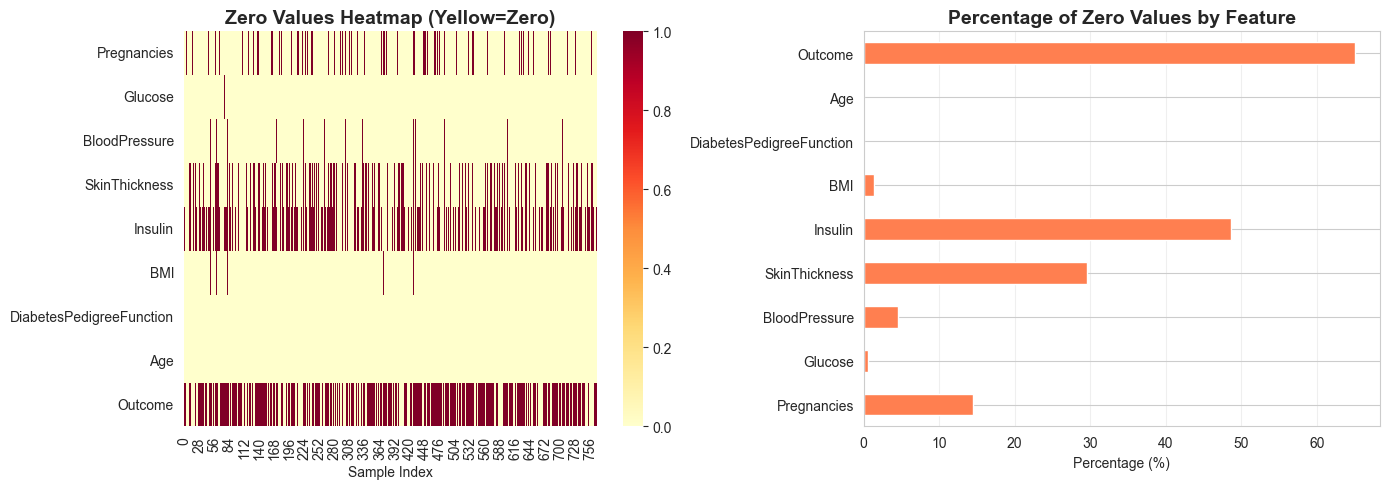

In [13]:
# Visualize missing data
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Heatmap of zero values
zero_mask = (diabetes_dataset == 0).astype(int)
sns.heatmap(zero_mask.T, cbar=True, cmap='YlOrRd', ax=axes[0], 
            yticklabels=diabetes_dataset.columns)
axes[0].set_title('Zero Values Heatmap (Yellow=Zero)', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Sample Index')

# Bar plot of zero percentages
zero_percentage.plot(kind='barh', ax=axes[1], color='coral')
axes[1].set_title('Percentage of Zero Values by Feature', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Percentage (%)')
axes[1].grid(axis='x', alpha=0.3)

plt.tight_layout()
plt.show()

In [14]:
# Handle missing values
# Create a copy for processing
df_processed = diabetes_dataset.copy()

# Columns where 0 is medically impossible/suspicious
columns_with_suspicious_zeros = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

In [15]:
# Replace zeros with NaN
for column in columns_with_suspicious_zeros:
    df_processed[column] = df_processed[column].replace(0, np.nan)

print(f"\nMissing values after treating zeros as NaN:")
print(df_processed.isnull().sum())


Missing values after treating zeros as NaN:
Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64


In [16]:
# Impute missing values with median (robust to outliers)
imputer = SimpleImputer(strategy='median')
df_processed[columns_with_suspicious_zeros] = imputer.fit_transform(
    df_processed[columns_with_suspicious_zeros]
)

print(f"\n✓ Missing values imputed using median strategy")
print(f"\nFinal missing values count:")
print(df_processed.isnull().sum())


✓ Missing values imputed using median strategy

Final missing values count:
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


In [17]:
# Use processed dataset
diabetes_dataset = df_processed.copy()

# Exploratory Data Analysis (EDA)

In [18]:
outcome_counts = diabetes_dataset['Outcome'].value_counts()
print("\nOutcome Distribution:")
print(outcome_counts)
print(f"\nNon-Diabetic (0): {outcome_counts[0]} ({outcome_counts[0]/len(diabetes_dataset)*100:.1f}%)")
print(f"Diabetic (1): {outcome_counts[1]} ({outcome_counts[1]/len(diabetes_dataset)*100:.1f}%)")



Outcome Distribution:
Outcome
0    500
1    268
Name: count, dtype: int64

Non-Diabetic (0): 500 (65.1%)
Diabetic (1): 268 (34.9%)


# **4. Data Visualisation**

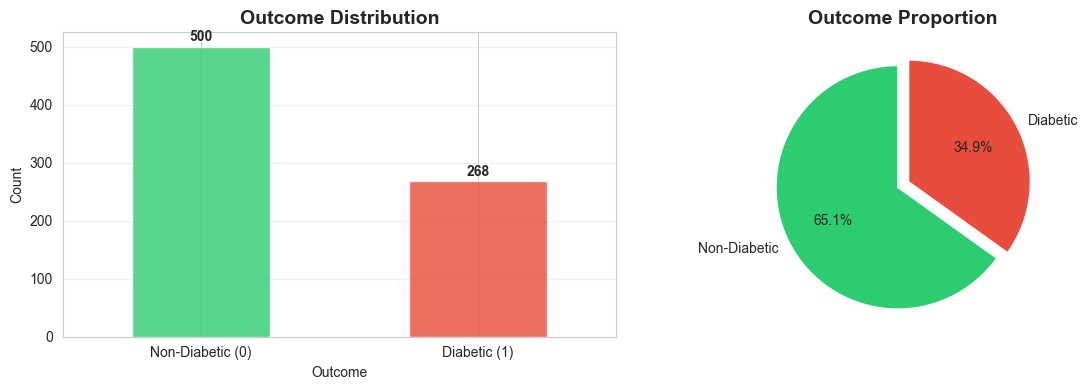

In [19]:
# Visualize outcome distribution
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# Bar plot
outcome_counts.plot(kind='bar', ax=axes[0], color=['#2ecc71', '#e74c3c'], alpha=0.8)
axes[0].set_title('Outcome Distribution', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Outcome')
axes[0].set_ylabel('Count')
axes[0].set_xticklabels(['Non-Diabetic (0)', 'Diabetic (1)'], rotation=0)
axes[0].grid(axis='y', alpha=0.3)

# Add count labels on bars
for i, v in enumerate(outcome_counts):
    axes[0].text(i, v + 10, str(v), ha='center', fontweight='bold')

# Pie chart
axes[1].pie(outcome_counts, labels=['Non-Diabetic', 'Diabetic'],
           autopct='%1.1f%%', colors=['#2ecc71', '#e74c3c'],
           startangle=90, explode=(0.05, 0.05))
axes[1].set_title('Outcome Proportion', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()



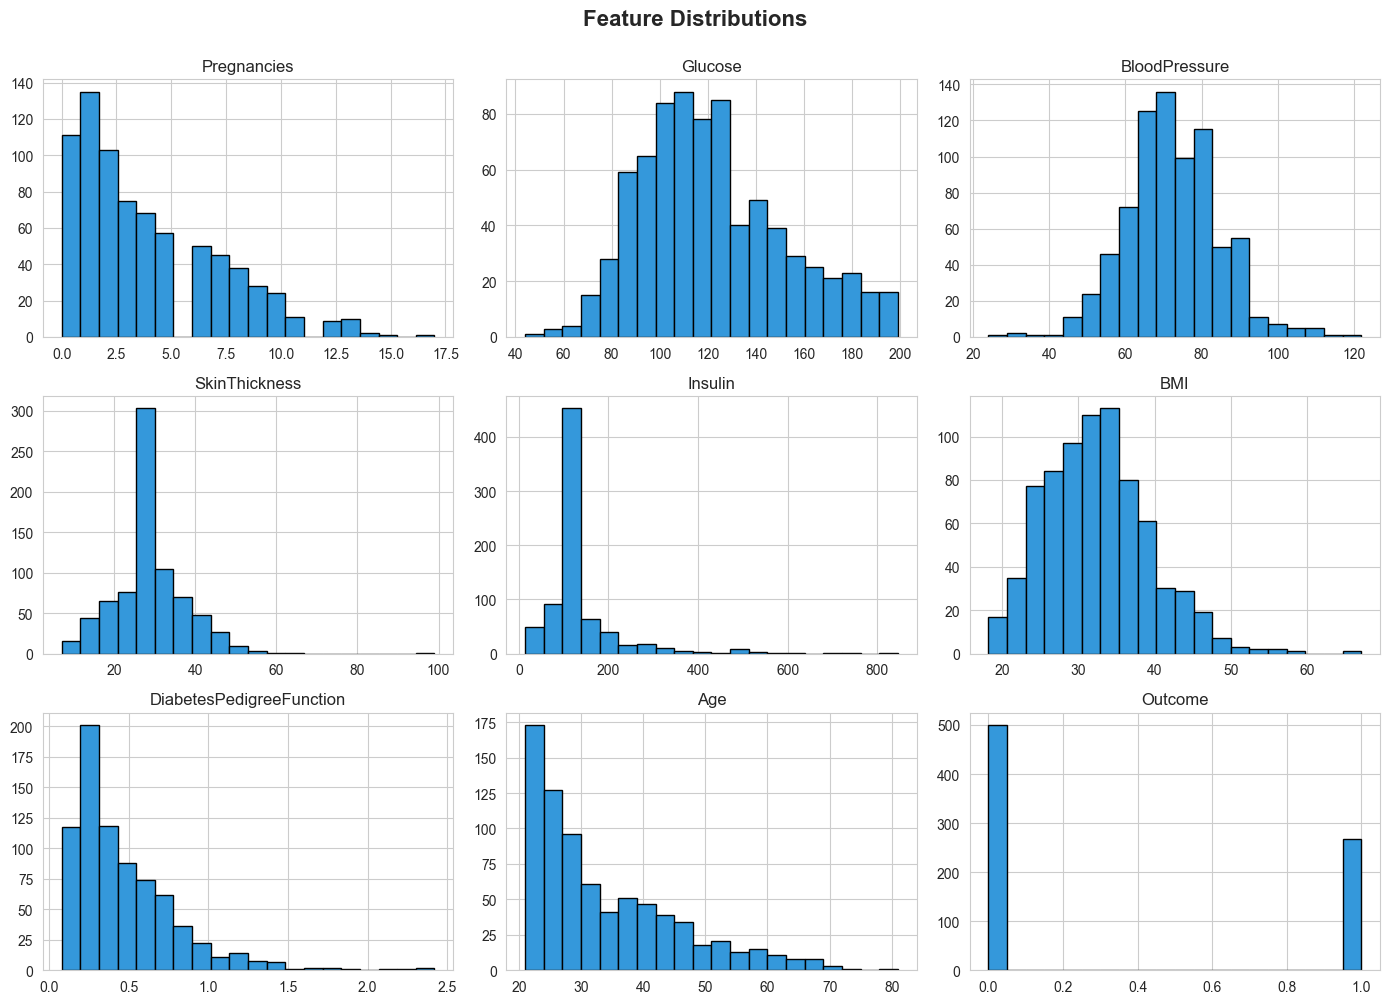

In [20]:
# Feature distributions
fig = diabetes_dataset.hist(bins=20, figsize=(14, 10), color='#3498db', edgecolor='black')
plt.suptitle("Feature Distributions", fontsize=16, fontweight='bold', y=1.00)
plt.tight_layout()
plt.show()

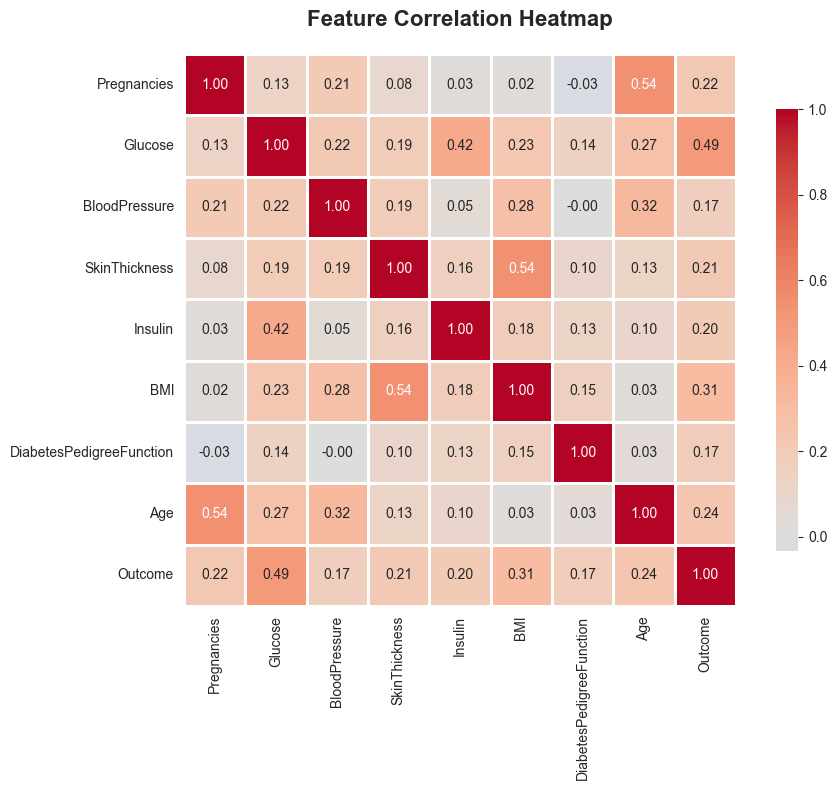

In [21]:
# Correlation analysis
# Calculate correlation matrix
correlation_matrix = diabetes_dataset.corr()

# Plot correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', 
            center=0, square=True, linewidths=1, cbar_kws={"shrink": 0.8})
plt.title('Feature Correlation Heatmap', fontsize=16, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

In [22]:
# Print top correlations with Outcome
print("\nFeature Correlations with Outcome (sorted):")
outcome_corr = correlation_matrix['Outcome'].sort_values(ascending=False)
print(outcome_corr)


Feature Correlations with Outcome (sorted):
Outcome                     1.000000
Glucose                     0.492782
BMI                         0.312038
Age                         0.238356
Pregnancies                 0.221898
SkinThickness               0.214873
Insulin                     0.203790
DiabetesPedigreeFunction    0.173844
BloodPressure               0.165723
Name: Outcome, dtype: float64


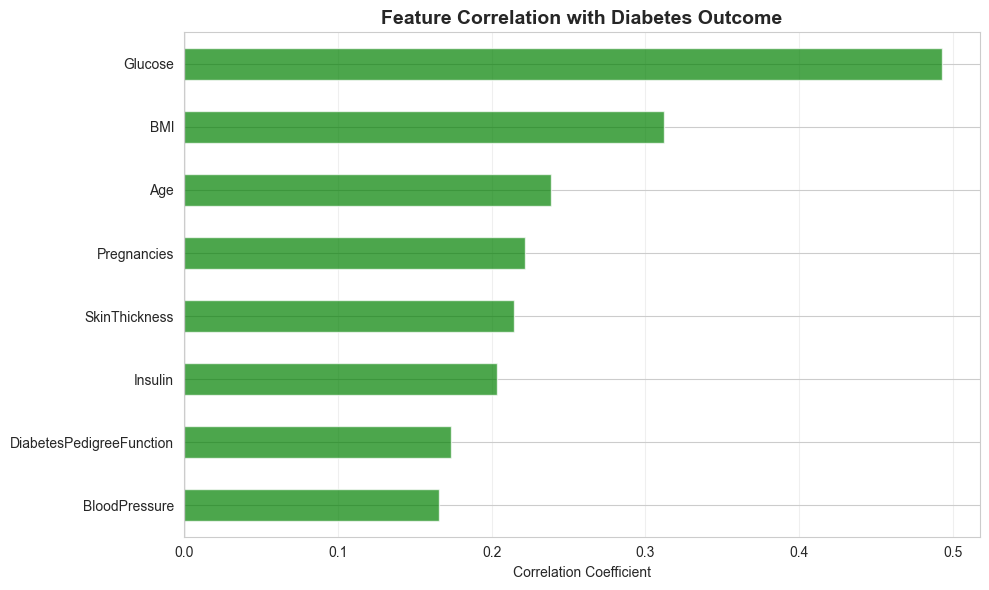

In [23]:
# Correlation with outcome visualization
plt.figure(figsize=(10, 6))
outcome_corr_sorted = correlation_matrix['Outcome'].drop('Outcome').sort_values()
colors = ['red' if x < 0 else 'green' for x in outcome_corr_sorted]
outcome_corr_sorted.plot(kind='barh', color=colors, alpha=0.7)
plt.title('Feature Correlation with Diabetes Outcome', fontsize=14, fontweight='bold')
plt.xlabel('Correlation Coefficient')
plt.axvline(x=0, color='black', linestyle='-', linewidth=0.8)
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()

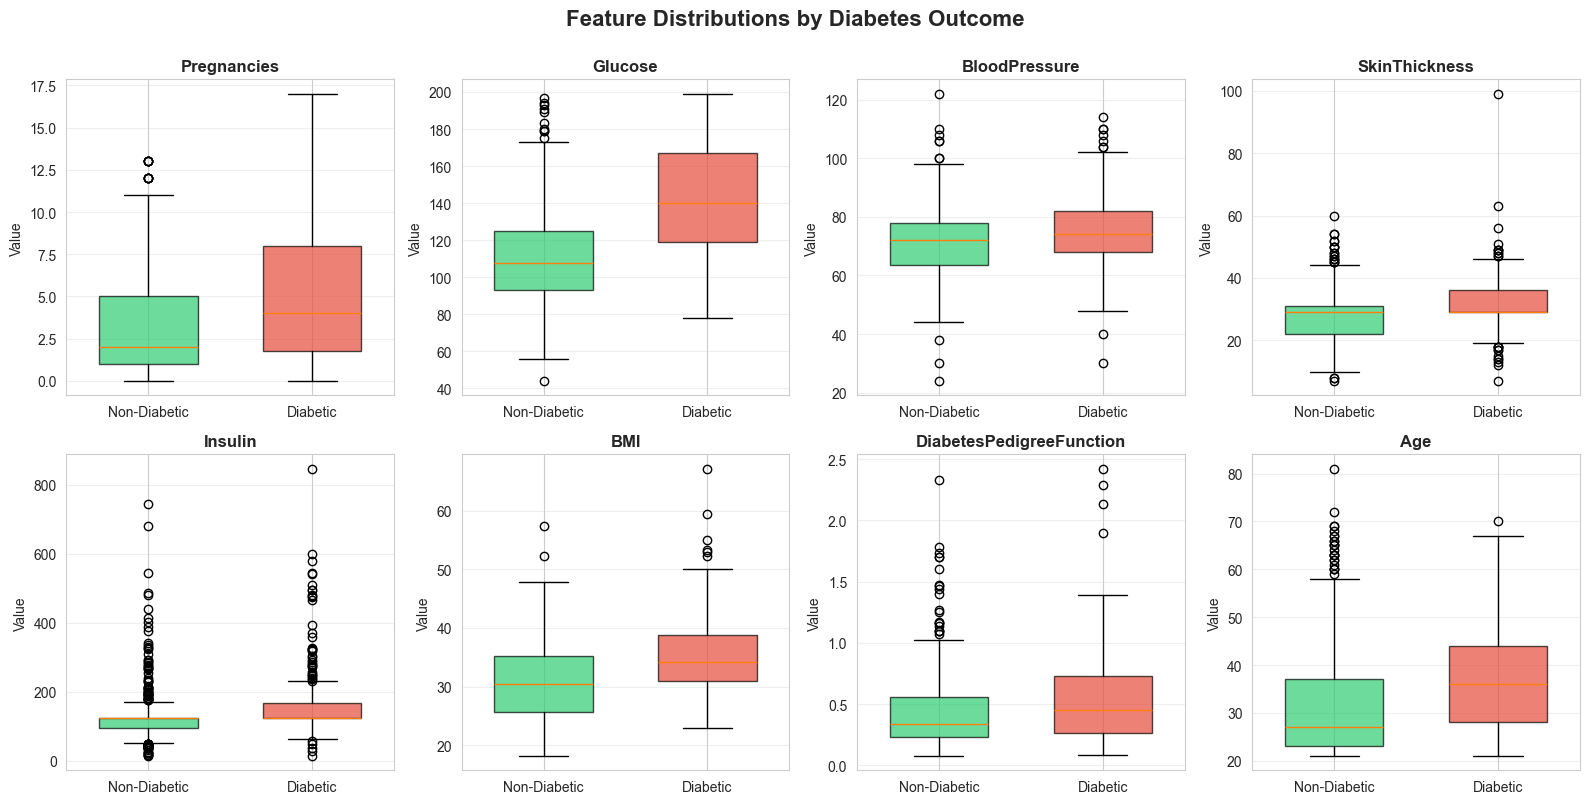

In [24]:
# Box plots for all features by outcome
fig, axes = plt.subplots(2, 4, figsize=(16, 8))
axes = axes.ravel()

features = diabetes_dataset.columns[:-1]
colors = ['#2ecc71', '#e74c3c']

for idx, feature in enumerate(features):
    box_data = [diabetes_dataset[diabetes_dataset['Outcome']==0][feature],
                diabetes_dataset[diabetes_dataset['Outcome']==1][feature]]
    bp = axes[idx].boxplot(box_data, labels=['Non-Diabetic', 'Diabetic'],
                           patch_artist=True, widths=0.6)
    
    # Color the boxes
    for patch, color in zip(bp['boxes'], colors):
        patch.set_facecolor(color)
        patch.set_alpha(0.7)
    
    axes[idx].set_title(f'{feature}', fontweight='bold')
    axes[idx].set_ylabel('Value')
    axes[idx].grid(axis='y', alpha=0.3)

plt.suptitle('Feature Distributions by Diabetes Outcome', 
             fontsize=16, fontweight='bold', y=1.00)
plt.tight_layout()
plt.show()


Generating pairplot for key features (this may take a moment)...


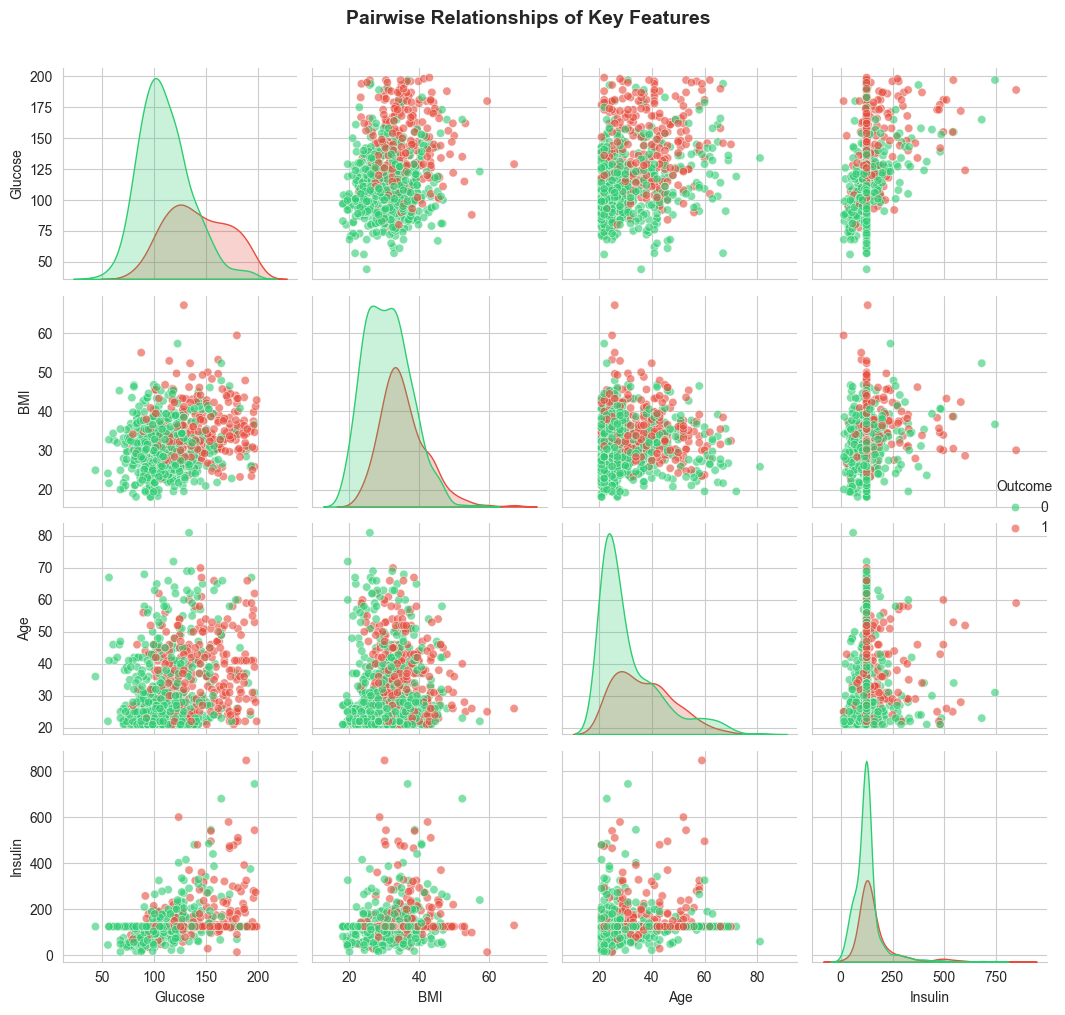

In [25]:
# Pairplot for key features
print("\nGenerating pairplot for key features (this may take a moment)...")
key_features = ['Glucose', 'BMI', 'Age', 'Insulin', 'Outcome']
sns.pairplot(diabetes_dataset[key_features], hue='Outcome', 
             palette={0: '#2ecc71', 1: '#e74c3c'}, 
             diag_kind='kde', plot_kws={'alpha': 0.6})
plt.suptitle("Pairwise Relationships of Key Features", y=1.01, fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

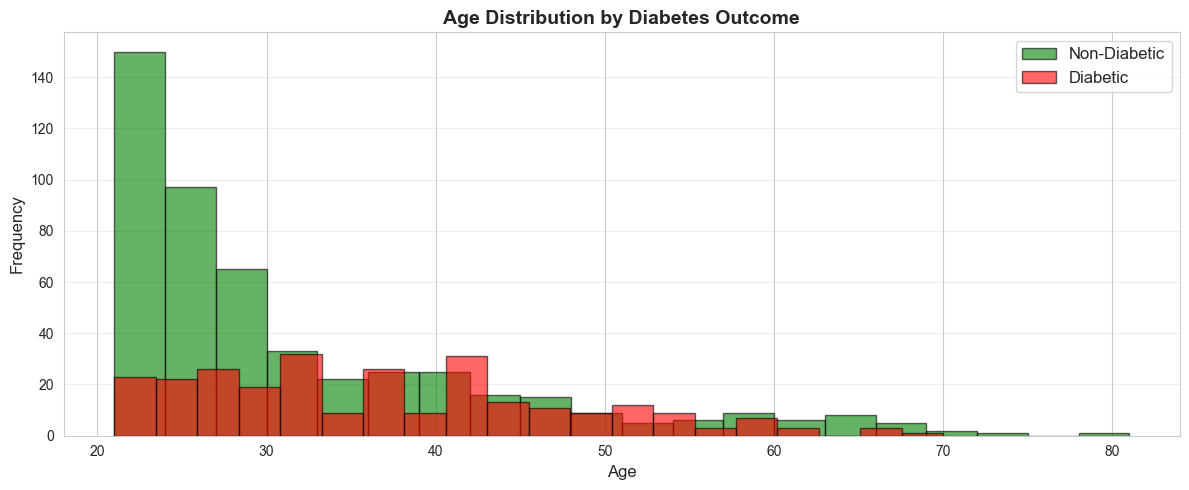

In [26]:
# Age distribution by outcome
plt.figure(figsize=(12, 5))
diabetes_dataset[diabetes_dataset['Outcome']==0]['Age'].hist(
    bins=20, alpha=0.6, label='Non-Diabetic', color='green', edgecolor='black')
diabetes_dataset[diabetes_dataset['Outcome']==1]['Age'].hist(
    bins=20, alpha=0.6, label='Diabetic', color='red', edgecolor='black')
plt.xlabel('Age', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.title('Age Distribution by Diabetes Outcome', fontsize=14, fontweight='bold')
plt.legend(fontsize=12)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

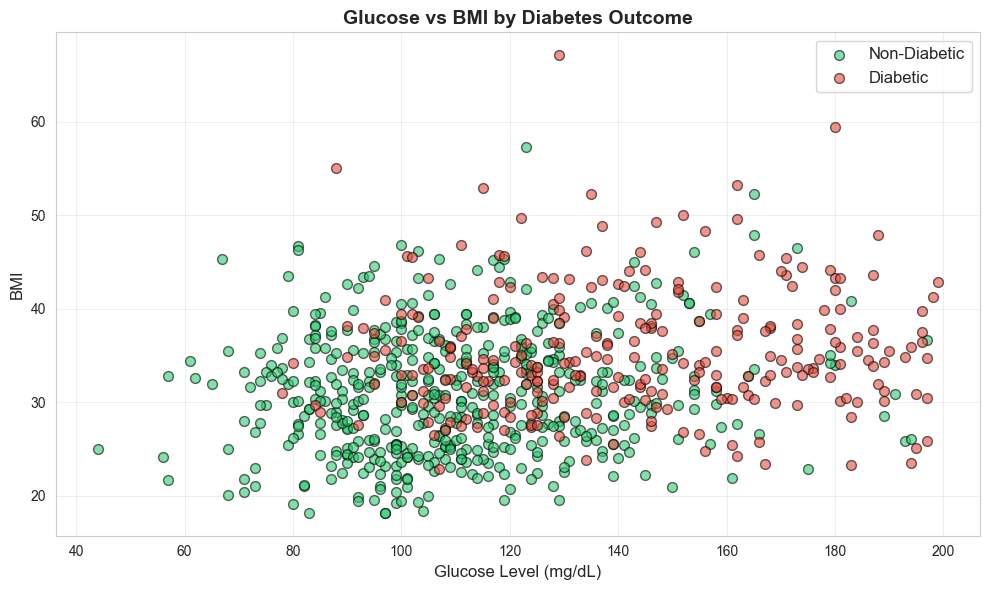

In [27]:
# Glucose vs BMI scatter plot
plt.figure(figsize=(10, 6))
colors_map = {0: '#2ecc71', 1: '#e74c3c'}
for outcome in [0, 1]:
    mask = diabetes_dataset['Outcome'] == outcome
    label = 'Non-Diabetic' if outcome == 0 else 'Diabetic'
    plt.scatter(diabetes_dataset[mask]['Glucose'], 
               diabetes_dataset[mask]['BMI'],
               c=colors_map[outcome], label=label, alpha=0.6, 
               edgecolors='black', s=50)

plt.xlabel('Glucose Level (mg/dL)', fontsize=12)
plt.ylabel('BMI', fontsize=12)
plt.title('Glucose vs BMI by Diabetes Outcome', fontsize=14, fontweight='bold')
plt.legend(fontsize=12)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

In [28]:
# Group statistics by outcome
group_stats = diabetes_dataset.groupby('Outcome').mean()
print("\nMean values by outcome:")
print(group_stats.round(2))


Mean values by outcome:
         Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin    BMI  \
Outcome                                                                       
0               3.30   110.68          70.92          27.73   127.79  30.89   
1               4.87   142.13          75.12          31.69   164.70  35.38   

         DiabetesPedigreeFunction    Age  
Outcome                                   
0                            0.43  31.19  
1                            0.55  37.07  


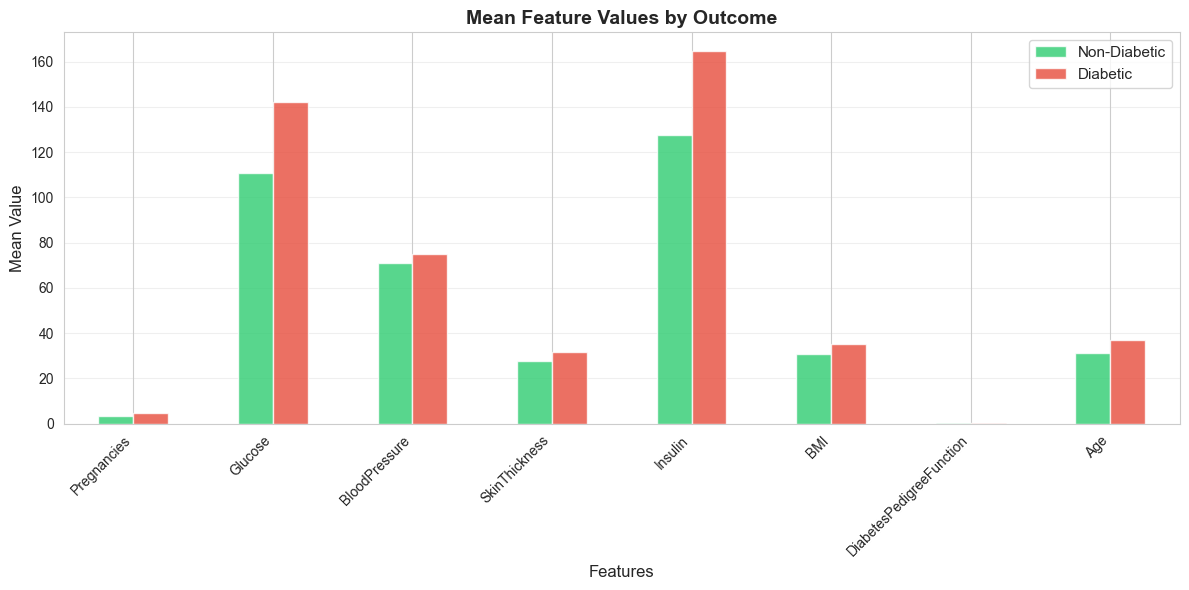

In [29]:
# Visualize mean differences
fig, ax = plt.subplots(figsize=(12, 6))
group_stats.T.plot(kind='bar', ax=ax, color=['#2ecc71', '#e74c3c'], alpha=0.8)
ax.set_title('Mean Feature Values by Outcome', fontsize=14, fontweight='bold')
ax.set_xlabel('Features', fontsize=12)
ax.set_ylabel('Mean Value', fontsize=12)
ax.legend(['Non-Diabetic', 'Diabetic'], fontsize=11)
ax.grid(axis='y', alpha=0.3)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# **5. Feature Selection and Data Preparation**

In [30]:
# Separate features and target
X = diabetes_dataset.drop(columns='Outcome', axis=1)
y = diabetes_dataset['Outcome']

print(f"\nFeatures shape: {X.shape}")
print(f"Target shape: {y.shape}")
print(f"\nFeature columns: {X.columns.tolist()}")


Features shape: (768, 8)
Target shape: (768,)

Feature columns: ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']


# **6. Data Standardization**

# Train-Test Split (Before Standardization)

In [31]:
# Split the data (stratified to maintain class balance)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

print(f"\n✓ Data split completed")
print(f"Training set size: {X_train.shape[0]} samples ({X_train.shape[0]/len(X)*100:.1f}%)")
print(f"Test set size: {X_test.shape[0]} samples ({X_test.shape[0]/len(X)*100:.1f}%)")
print(f"\nTraining set shape: {X_train.shape}")
print(f"Test set shape: {X_test.shape}")


✓ Data split completed
Training set size: 614 samples (79.9%)
Test set size: 154 samples (20.1%)

Training set shape: (614, 8)
Test set shape: (154, 8)


In [32]:
# Check class balance in splits
print(f"\nClass distribution in training set:")
print(y_train.value_counts())
print(f"\nClass distribution in test set:")
print(y_test.value_counts())


Class distribution in training set:
Outcome
0    400
1    214
Name: count, dtype: int64

Class distribution in test set:
Outcome
0    100
1     54
Name: count, dtype: int64


# Feature Standardization (After Split)

In [33]:
# Initialize StandardScaler
scaler = StandardScaler()

# Fit scaler on training data ONLY
scaler.fit(X_train)

,copy,True
,with_mean,True
,with_std,True


In [34]:
# Transform both training and test data
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(f"\n✓ Features standardized using StandardScaler")
print(f"Training data scaled shape: {X_train_scaled.shape}")
print(f"Test data scaled shape: {X_test_scaled.shape}")


✓ Features standardized using StandardScaler
Training data scaled shape: (614, 8)
Test data scaled shape: (154, 8)


In [35]:
# Show example of standardization
print(f"\nExample - Before standardization (first sample):")
print(X_train.iloc[0].values)
print(f"\nExample - After standardization (first sample):")
print(X_train_scaled[0])


Example - Before standardization (first sample):
[ 1.   90.   62.   12.   43.   27.2   0.58 24.  ]

Example - After standardization (first sample):
[-0.85135507 -1.05642747 -0.82674004 -1.91818693 -1.20336073 -0.76947697
  0.31079384 -0.79216928]


# **7. Training the Models**

In [36]:
# Initialize models
models = {
    'SVM': SVC(kernel='linear', random_state=42),
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42)
}

In [37]:
# Train all models
trained_models = {}

for name, model in models.items():
    print(f"\nTraining {name}...")
    model.fit(X_train_scaled, y_train)
    trained_models[name] = model
    print(f"✓ {name} trained successfully")


Training SVM...
✓ SVM trained successfully

Training Logistic Regression...
✓ Logistic Regression trained successfully

Training Random Forest...
✓ Random Forest trained successfully


# **8. Cross Validation & Model Evaluation**

In [38]:
# Dictionary to store all results
model_results = {}

for name, model in trained_models.items():
    
    # Predictions
    y_train_pred = model.predict(X_train_scaled)
    y_test_pred = model.predict(X_test_scaled)
    
    # Basic accuracy
    train_acc = accuracy_score(y_train, y_train_pred)
    test_acc = accuracy_score(y_test, y_test_pred)
    
    # Additional metrics
    precision = precision_score(y_test, y_test_pred)
    recall = recall_score(y_test, y_test_pred)
    f1 = f1_score(y_test, y_test_pred)
    
    # Cross-validation (on original data with proper pipeline)
    cv_scores = cross_val_score(model, X_train_scaled, y_train, cv=5, scoring='accuracy')
    cv_mean = cv_scores.mean()
    cv_std = cv_scores.std()
    
    # Store results
    model_results[name] = {
        'Training Accuracy': train_acc,
        'Test Accuracy': test_acc,
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1,
        'CV Mean': cv_mean,
        'CV Std': cv_std
    }
    
    # Print metrics
    print(f"\nPerformance Metrics:")
    print(f"  Training Accuracy:     {train_acc:.4f}")
    print(f"  Test Accuracy:         {test_acc:.4f}")
    print(f"  Precision:             {precision:.4f}")
    print(f"  Recall (Sensitivity):  {recall:.4f}")
    print(f"  F1-Score:              {f1:.4f}")
    print(f"  Cross-Validation:      {cv_mean:.4f} (+/- {cv_std:.4f})")
    
    # Classification Report
    print(f"\nClassification Report:")
    print(classification_report(y_test, y_test_pred, 
                               target_names=['Non-Diabetic', 'Diabetic'],
                               digits=4))
    
    # Confusion Matrix
    cm = confusion_matrix(y_test, y_test_pred)
    print(f"\nConfusion Matrix:")
    print(f"                  Predicted")
    print(f"                  Non-Diabetic       Diabetic")
    print(f"Actual Non-Diabetic  {cm[0,0]:5d}         {cm[0,1]:5d}")
    print(f"       Diabetic      {cm[1,0]:5d}         {cm[1,1]:5d}")


Performance Metrics:
  Training Accuracy:     0.7866
  Test Accuracy:         0.7013
  Precision:             0.5909
  Recall (Sensitivity):  0.4815
  F1-Score:              0.5306
  Cross-Validation:      0.7704 (+/- 0.0190)

Classification Report:
              precision    recall  f1-score   support

Non-Diabetic     0.7455    0.8200    0.7810       100
    Diabetic     0.5909    0.4815    0.5306        54

    accuracy                         0.7013       154
   macro avg     0.6682    0.6507    0.6558       154
weighted avg     0.6913    0.7013    0.6932       154


Confusion Matrix:
                  Predicted
                  Non-Diabetic       Diabetic
Actual Non-Diabetic     82            18
       Diabetic         28            26

Performance Metrics:
  Training Accuracy:     0.7964
  Test Accuracy:         0.7078
  Precision:             0.6000
  Recall (Sensitivity):  0.5000
  F1-Score:              0.5455
  Cross-Validation:      0.7818 (+/- 0.0125)

Classification Repo

# **10. Model Performance**

# *Confusion Matrix Visualizations*

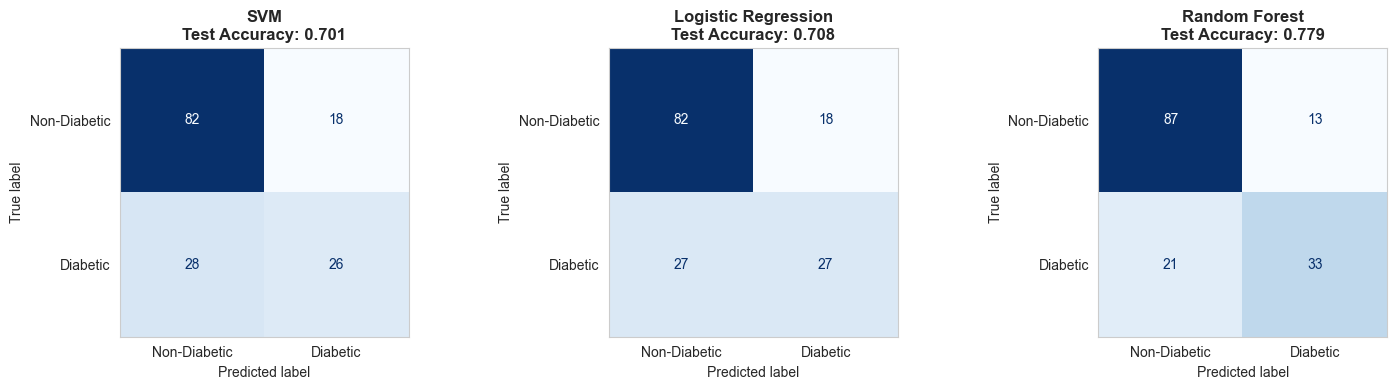

In [39]:
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

for idx, (name, model) in enumerate(trained_models.items()):
    y_pred = model.predict(X_test_scaled)
    cm = confusion_matrix(y_test, y_pred)
    
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, 
                                  display_labels=['Non-Diabetic', 'Diabetic'])
    disp.plot(ax=axes[idx], cmap='Blues', values_format='d', colorbar=False)
    axes[idx].set_title(f'{name}\nTest Accuracy: {model_results[name]["Test Accuracy"]:.3f}',
                       fontweight='bold')
    axes[idx].grid(False)

plt.tight_layout()
plt.show()

# *Model Comparison Summary*

In [40]:
# Create comparison DataFrame
results_df = pd.DataFrame(model_results).T
results_df = results_df.round(4)

print("\n📊 Complete Model Comparison:")
print(results_df)


📊 Complete Model Comparison:
                     Training Accuracy  Test Accuracy  Precision  Recall  \
SVM                             0.7866         0.7013     0.5909  0.4815   
Logistic Regression             0.7964         0.7078     0.6000  0.5000   
Random Forest                   1.0000         0.7792     0.7174  0.6111   

                     F1-Score  CV Mean  CV Std  
SVM                    0.5306   0.7704  0.0190  
Logistic Regression    0.5455   0.7818  0.0125  
Random Forest          0.6600   0.7688  0.0337  


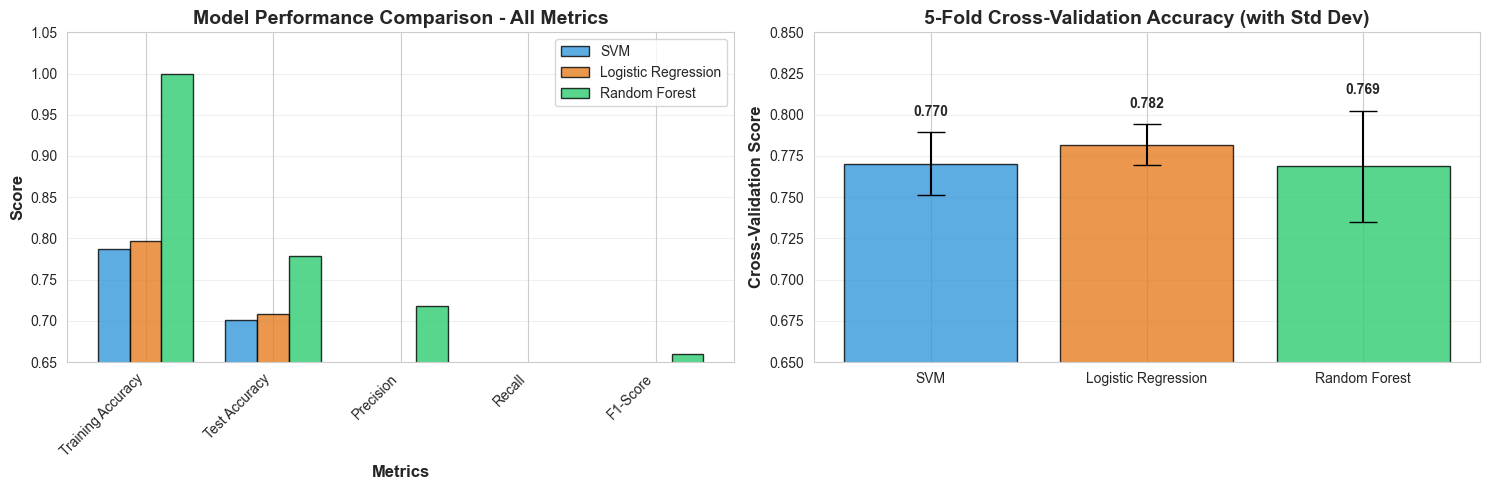

In [41]:
# Visualize model comparison
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Plot 1: All metrics comparison
metrics = ['Training Accuracy', 'Test Accuracy', 'Precision', 'Recall', 'F1-Score']
x = np.arange(len(metrics))
width = 0.25

colors = ['#3498db', '#e67e22', '#2ecc71']
for idx, (model_name, results) in enumerate(model_results.items()):
    values = [results[m] for m in metrics]
    axes[0].bar(x + idx*width, values, width, label=model_name, 
               color=colors[idx], alpha=0.8, edgecolor='black')

axes[0].set_xlabel('Metrics', fontsize=12, fontweight='bold')
axes[0].set_ylabel('Score', fontsize=12, fontweight='bold')
axes[0].set_title('Model Performance Comparison - All Metrics', 
                 fontsize=14, fontweight='bold')
axes[0].set_xticks(x + width)
axes[0].set_xticklabels(metrics, rotation=45, ha='right')
axes[0].legend(fontsize=10)
axes[0].grid(axis='y', alpha=0.3)
axes[0].set_ylim([0.65, 1.05])



# Plot 2: Cross-validation scores with error bars
cv_means = [results['CV Mean'] for results in model_results.values()]
cv_stds = [results['CV Std'] for results in model_results.values()]
axes[1].bar(model_results.keys(), cv_means, yerr=cv_stds, 
           color=colors, alpha=0.8, capsize=10, edgecolor='black')
axes[1].set_ylabel('Cross-Validation Score', fontsize=12, fontweight='bold')
axes[1].set_title('5-Fold Cross-Validation Accuracy (with Std Dev)', 
                 fontsize=14, fontweight='bold')
axes[1].set_ylim([0.65, 0.85])
axes[1].grid(axis='y', alpha=0.3)

# Add value labels on bars
for i, (mean, std) in enumerate(zip(cv_means, cv_stds)):
    axes[1].text(i, mean + std + 0.01, f'{mean:.3f}', 
                ha='center', fontweight='bold')

plt.tight_layout()
plt.show()

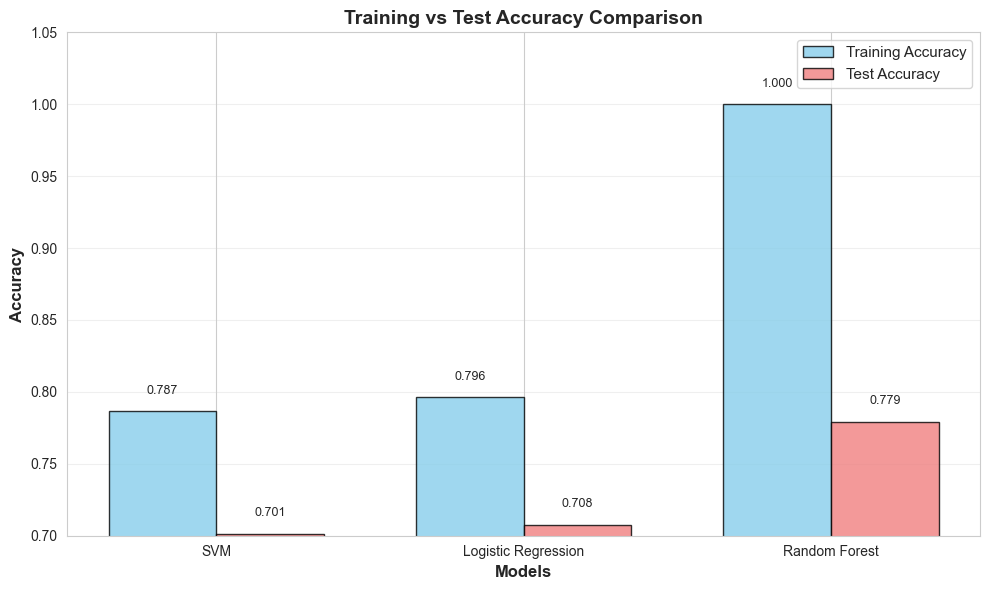

In [42]:
# Test vs Training Accuracy Comparison
fig, ax = plt.subplots(figsize=(10, 6))

model_names = list(model_results.keys())
train_accs = [model_results[m]['Training Accuracy'] for m in model_names]
test_accs = [model_results[m]['Test Accuracy'] for m in model_names]

x = np.arange(len(model_names))
width = 0.35

bars1 = ax.bar(x - width/2, train_accs, width, label='Training Accuracy',
              color='skyblue', alpha=0.8, edgecolor='black')
bars2 = ax.bar(x + width/2, test_accs, width, label='Test Accuracy',
              color='lightcoral', alpha=0.8, edgecolor='black')

ax.set_xlabel('Models', fontsize=12, fontweight='bold')
ax.set_ylabel('Accuracy', fontsize=12, fontweight='bold')
ax.set_title('Training vs Test Accuracy Comparison', fontsize=14, fontweight='bold')
ax.set_xticks(x)
ax.set_xticklabels(model_names)
ax.legend(fontsize=11)
ax.grid(axis='y', alpha=0.3)
ax.set_ylim([0.7, 1.05])

# Add value labels
for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height + 0.01,
               f'{height:.3f}', ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()

## ROC Curves Analysis

SVM - AUC Score: 0.8133
Logistic Regression - AUC Score: 0.8130
Random Forest - AUC Score: 0.8179


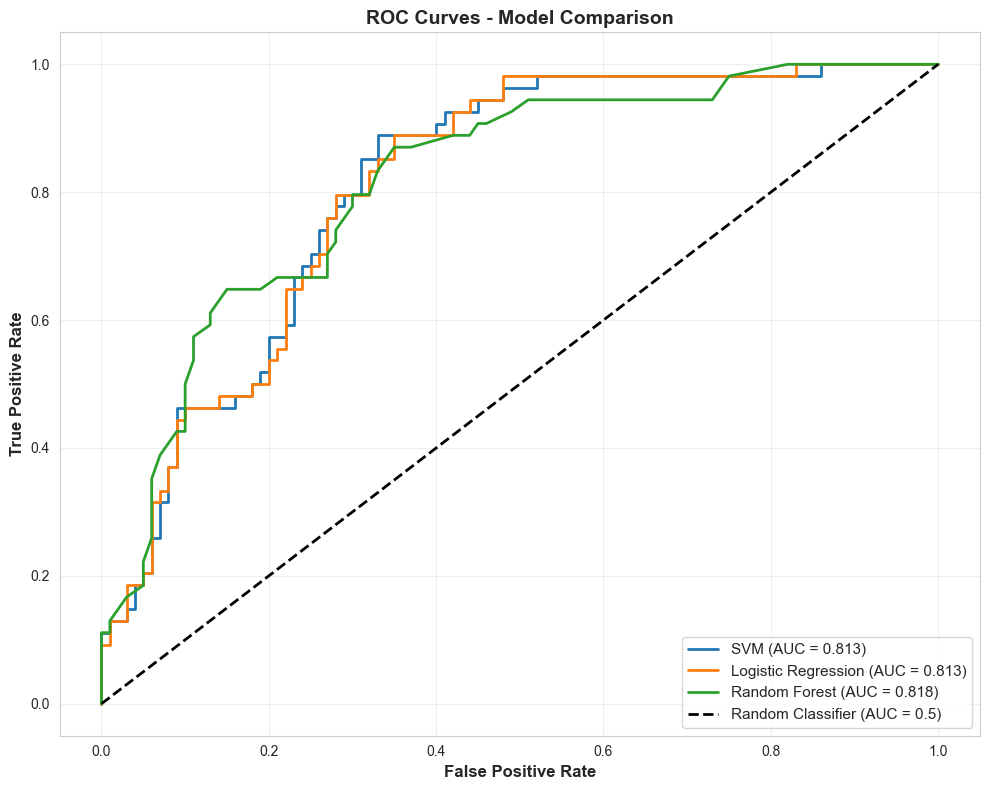

In [43]:
plt.figure(figsize=(10, 8))

# Calculate ROC curves for each model
for name, model in trained_models.items():
    # Get probability scores or decision function
    if hasattr(model, 'predict_proba'):
        y_scores = model.predict_proba(X_test_scaled)[:, 1]
    elif hasattr(model, 'decision_function'):
        y_scores = model.decision_function(X_test_scaled)
    else:
        continue
    
    # Calculate ROC curve
    fpr, tpr, _ = roc_curve(y_test, y_scores)
    roc_auc = auc(fpr, tpr)
    
    # Plot
    plt.plot(fpr, tpr, linewidth=2, 
            label=f'{name} (AUC = {roc_auc:.3f})')
    
    print(f"{name} - AUC Score: {roc_auc:.4f}")

# Plot diagonal line
plt.plot([0, 1], [0, 1], 'k--', linewidth=2, label='Random Classifier (AUC = 0.5)')

plt.xlabel('False Positive Rate', fontsize=12, fontweight='bold')
plt.ylabel('True Positive Rate', fontsize=12, fontweight='bold')
plt.title('ROC Curves - Model Comparison', fontsize=14, fontweight='bold')
plt.legend(loc='lower right', fontsize=11)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

# **10. Best Model Selection**

In [44]:
# Select best model based on test accuracy
best_model_name = results_df['Test Accuracy'].idxmax()
best_model = trained_models[best_model_name]
best_test_acc = results_df.loc[best_model_name, 'Test Accuracy']
best_cv_acc = results_df.loc[best_model_name, 'CV Mean']

print(f"\nBEST MODEL: {best_model_name}")
print(f"   Test Accuracy:          {best_test_acc:.4f}")
print(f"   Cross-Validation:       {best_cv_acc:.4f}")
print(f"   Precision:              {results_df.loc[best_model_name, 'Precision']:.4f}")
print(f"   Recall:                 {results_df.loc[best_model_name, 'Recall']:.4f}")
print(f"   F1-Score:               {results_df.loc[best_model_name, 'F1-Score']:.4f}")




BEST MODEL: Random Forest
   Test Accuracy:          0.7792
   Cross-Validation:       0.7688
   Precision:              0.7174
   Recall:                 0.6111
   F1-Score:               0.6600


# **11. Prediction Demonstration**

In [45]:
test_cases = [
    {
        'name': 'High Risk Patient',
        'data': (10, 168, 74, 30, 150, 38.0, 0.537, 45),
        'description': 'High pregnancies, elevated glucose, high BMI, older age'
    },
    {
        'name': 'Low Risk Patient',
        'data': (1, 85, 66, 29, 80, 26.6, 0.351, 25),
        'description': 'Low pregnancies, normal glucose, healthy BMI, young age'
    },
    {
        'name': 'Medium Risk Patient',
        'data': (5, 116, 74, 25, 100, 30.1, 0.201, 35),
        'description': 'Moderate values across all features'
    },
    {
        'name': 'Borderline Patient',
        'data': (3, 140, 80, 35, 120, 32.5, 0.400, 40),
        'description': 'Elevated glucose and BMI, moderate age'
    }
]

for case in test_cases:
    print(f"\n{'-'*60}")
    print(f"📋 Test Case: {case['name']}")
    print(f"   Description: {case['description']}")
    print(f"   Input Values: {case['data']}")
    
    # Convert to DataFrame
    input_df = pd.DataFrame([case['data']], columns=X.columns)
    
    # Standardize
    input_scaled = scaler.transform(input_df)
    
    # Predict
    prediction = best_model.predict(input_scaled)[0]
    
    # Get confidence
    if hasattr(best_model, 'decision_function'):
        confidence = best_model.decision_function(input_scaled)[0]
        print(f"   Decision Score: {confidence:.4f}")
    elif hasattr(best_model, 'predict_proba'):
        proba = best_model.predict_proba(input_scaled)[0]
        confidence = proba[1]
        print(f"   Probability: {confidence:.4f}")
    
    # Result
    result = "DIABETIC" if prediction == 1 else "NON-DIABETIC"
    print(f"   Prediction: {result}")



------------------------------------------------------------
📋 Test Case: High Risk Patient
   Description: High pregnancies, elevated glucose, high BMI, older age
   Input Values: (10, 168, 74, 30, 150, 38.0, 0.537, 45)
   Probability: 0.9600
   Prediction: DIABETIC

------------------------------------------------------------
📋 Test Case: Low Risk Patient
   Description: Low pregnancies, normal glucose, healthy BMI, young age
   Input Values: (1, 85, 66, 29, 80, 26.6, 0.351, 25)
   Probability: 0.0000
   Prediction: NON-DIABETIC

------------------------------------------------------------
📋 Test Case: Medium Risk Patient
   Description: Moderate values across all features
   Input Values: (5, 116, 74, 25, 100, 30.1, 0.201, 35)
   Probability: 0.3500
   Prediction: NON-DIABETIC

------------------------------------------------------------
📋 Test Case: Borderline Patient
   Description: Elevated glucose and BMI, moderate age
   Input Values: (3, 140, 80, 35, 120, 32.5, 0.4, 40)
   Pr

# **12. Model Saving**

In [46]:
import os
os.chdir('..')

# Save best model
with open("model.pkl", "wb") as f:
    pickle.dump(best_model, f)
print(f"\n✓ Model saved: model.pkl")
print(f"  Model type: {best_model_name}")
print(f"  Test Accuracy: {best_test_acc:.4f}")

# Save scaler
with open("scaler.pkl", "wb") as f:
    pickle.dump(scaler, f)
print("\n✓ Scaler saved: scaler.pkl")




✓ Model saved: model.pkl
  Model type: Random Forest
  Test Accuracy: 0.7792

✓ Scaler saved: scaler.pkl


# **13. Model Prediction**

In [47]:
# Model Prediction Verification
print("Model Prediction Verification:")
try:
    with open("model.pkl", "rb") as f:
        loaded_model = pickle.load(f)
    with open("scaler.pkl", "rb") as f:
        loaded_scaler = pickle.load(f)
    
    test_input = np.array([[8,183,64,0,0,23.3,0.672,32]])
    test_scaled = loaded_scaler.transform(test_input)
    test_pred = loaded_model.predict(test_scaled)
    
    print("✓ Model loads correctly")
    print("✓ Predictions work correctly")
    print(f"✓ Test prediction: {test_pred[0]}")

except Exception as e:
    print(f"Error: {e}")

Model Prediction Verification:
✓ Model loads correctly
✓ Predictions work correctly
✓ Test prediction: 1
